# Limpieza de datos

Vamos a aplicar el [checklist del Banco Mundial](https://dimewiki.worldbank.org/wiki/Checklist:_Data_Cleaning) en Python usando el [SciPy stack](https://www.scipy.org/stackspec.html), principalmente pandas

## 0. Prerequisitos

Aclaración: La próxima celda es para compatilibidad con Colab, NO ES RECOMENDADO realizar pip install desde un notebook.

In [1]:
import sys
in_colab = 'google.colab' in sys.modules

if in_colab:
  BASE_DIR = "https://github.com/DiploDatos/AnalisisYCuracion/raw/master/"
else:
  BASE_DIR = ".."
if 'ftfy' not in sys.modules:
    !pip install 'ftfy<5.6'

# 1. Importando los datos

# 1.1. Verificar que no hay problemas en la importación

In [2]:
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format

# 1.2. Asegurar de tener ids/claves únicas

Pandas soporta índices en los DataFrames vamos a recargar el conjunto de datos

In [3]:
kickstarter_2018 = pd.read_csv(BASE_DIR + "/input/kickstarter-projects/ks-projects-201801.csv", 
                               parse_dates=["deadline","launched"],
                               index_col=['ID'])

#### Ejercicio 1:

Armar una tabla con todos los proyectos con nombres duplicados, ordenados para revisar agrupados. 

In [4]:
duplicated = kickstarter_2018[kickstarter_2018.name.duplicated(keep=False)].sort_values(['name'])
duplicated

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
816998285,"""...The Last shall be first..."" LODB Lifestyle...",Fashion,Fashion,USD,2014-02-09,6500.00,2013-12-19 21:51:50,0.00,canceled,0,US,0.00,0.00,6500.00
815783250,"""...The Last shall be first..."" LODB Lifestyle...",Fashion,Fashion,USD,2014-03-01,6500.00,2014-01-03 20:39:16,37.00,failed,3,US,37.00,37.00,6500.00
1010584633,"""A Fresh Start""",Shorts,Film & Video,USD,2011-09-25,3000.00,2011-08-28 21:27:52,3000.00,successful,24,US,3000.00,3000.00,3000.00
713417995,"""A Fresh Start""",Documentary,Film & Video,USD,2013-03-27,5000.00,2013-01-26 03:51:47,1417.00,failed,26,US,1417.00,1417.00,5000.00
1880084695,"""American Sports Stories"" - An Athletic Quest",Shorts,Film & Video,USD,2015-08-26,100000.00,2015-06-27 02:02:00,100.00,failed,1,US,100.00,100.00,100000.00
422509694,"""American Sports Stories"" - An Athletic Quest",Television,Film & Video,USD,2017-05-14,100000.00,2017-04-14 00:08:52,1.00,failed,1,US,25.00,1.00,100000.00
866225086,"""City of Mercy"" (Canceled)",Film & Video,Film & Video,USD,2015-02-26,20000.00,2015-01-27 19:30:43,7248.00,canceled,9,US,7248.00,7248.00,20000.00
1760892298,"""City of Mercy"" (Canceled)",Television,Film & Video,USD,2014-08-28,15000.00,2014-07-29 13:12:21,11260.00,canceled,7,US,11260.00,11260.00,15000.00
1999958521,"""Color"" Music Video",Film & Video,Film & Video,USD,2016-06-06,5000.00,2016-05-07 01:56:36,0.00,canceled,0,"N,0""",nan,0.00,5000.00


# 1.3. Despersonalizar datos y guardarlos en un nuevo archivo

#### Ejercicio 2:

Verificar que los proyectos que tienen nombres duplicados también tienen el hash de nombre duplicado

In [5]:
from hashlib import md5
kickstarter_2018['name']=str(kickstarter_2018['name'])
def hashit(val):
    return md5(val.encode('utf-8'))

kickstarter_2018['name'].apply(hashit)
duplicated = kickstarter_2018[kickstarter_2018.name.duplicated(keep=False)].sort_values(['name'])

In [6]:
original_count = duplicated.shape[0]
duplicated['name_hash']=duplicated['name'].apply(hashit)
duplicated_count=duplicated[['name', 'name_hash']].duplicated().shape[0]
original_count, duplicated_count

(378661, 378661)

# 1.4. Nunca modificar los datos crudos u originales


In [7]:
if not in_colab:
  kickstarter_2018.to_csv(BASE_DIR + "/output/ks-projects-201801-for-pandas.csv")


# 2. Pasos necesarios


In [8]:
#import pandas as pd
if not in_colab:
  kickstarter_2018 = pd.read_csv(BASE_DIR + "/output/ks-projects-201801-for-pandas.csv",
                        index_col='ID',
                        parse_dates=['deadline','launched'])

In [9]:
kickstarter_2018.describe(include='all')

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
count,378661,378661,378661,378661,378661,378661.00,378661,378661.00,378661,378661.00,378661,374864.00,378661.00,378661.00
unique,1,159,15,14,3164,nan,378089,nan,6,nan,23,nan,nan,nan
top,ID\n1000002330 The Songs ...,Product Design,Film & Video,USD,2014-08-08 00:00:00,nan,1970-01-01 01:00:00,nan,failed,nan,US,nan,nan,nan
freq,378661,22314,63585,295365,705,nan,7,nan,197719,nan,292627,nan,nan,nan
first,NaN,NaN,NaN,NaN,2009-05-03 00:00:00,nan,1970-01-01 01:00:00,nan,NaN,nan,NaN,nan,nan,nan
last,NaN,NaN,NaN,NaN,2018-03-03 00:00:00,nan,2018-01-02 15:02:31,nan,NaN,nan,NaN,nan,nan,nan
mean,NaN,NaN,NaN,NaN,NaN,49080.79,NaN,9682.98,NaN,105.62,NaN,7036.73,9058.92,45454.40
std,NaN,NaN,NaN,NaN,NaN,1183391.26,NaN,95636.01,NaN,907.19,NaN,78639.75,90973.34,1152950.06
min,NaN,NaN,NaN,NaN,NaN,0.01,NaN,0.00,NaN,0.00,NaN,0.00,0.00,0.01
25%,NaN,NaN,NaN,NaN,NaN,2000.00,NaN,30.00,NaN,2.00,NaN,16.98,31.00,2000.00


## 2.1. Etiquetas de variables/columnas: no usar caracteres especiales



In [10]:
# helpful character encoding module
import chardet

¿Por qué? Por que aun hay limitaciones para trabajar con estos caracteres.

¿Cúales son los caracteres "normales"? 

In [11]:
import string

string.ascii_letters + string.digits

'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'

#### Ejercicio 3

Comparar la cantidad de nombres raros en kickstarter_2018 con la que obtenemos al cargar 'ks-projects-201801.csv' con encoding iso-8859-1.

In [13]:
import ftfy.badness as bad

def weird(val):
    if isinstance(val, float): 
        return 0
    return bad.sequence_weirdness(val)

kickstarter_2018w = pd.read_csv(BASE_DIR + "/input/kickstarter-projects/ks-projects-201801.csv", encoding='iso-8859-1')
kickstarter_2018w['name_weirdness'] = kickstarter_2018w['name'].apply(weird)
kickstarter_2018w[kickstarter_2018w['name_weirdness'] > 1]['name_weirdness'].count()

7682

## 2.3. Codificar variables

Para trabajar con los algoritmos de aprendizaje automático, las variables categóricas estas deben ser codificadas como variables numéricas, no como cadenas.

Para esta tarea también hay diferentes estrategias, dos comunes son: asociar cadena a número y asociar cadena a columna.

In [14]:
from sklearn import preprocessing

#### Ejercicio 4

Codificar `currency` con ambas estrategias

In [15]:
column='currency'
# Create a label (category) encoder object
le = preprocessing.LabelEncoder()
# Fit the encoder to the pandas column
le.fit(kickstarter_2018[column])
kickstarter_2018['coded_currency'] = le.transform(kickstarter_2018[column]) 
kickstarter_2018.head()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,coded_currency
ID,,,,,,,,,,,,,,,
1000002330,ID\n1000002330 The Songs ...,Poetry,Publishing,GBP,2015-10-09,1000.00,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95,5
1000003930,ID\n1000002330 The Songs ...,Narrative Film,Film & Video,USD,2017-11-01,30000.00,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00,13
1000004038,ID\n1000002330 The Songs ...,Narrative Film,Film & Video,USD,2013-02-26,45000.00,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00,13
1000007540,ID\n1000002330 The Songs ...,Music,Music,USD,2012-04-16,5000.00,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00,13
1000011046,ID\n1000002330 The Songs ...,Film & Video,Film & Video,USD,2015-08-29,19500.00,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00,13


In [17]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()

lb_results = lb.fit_transform(kickstarter_2018[column])
pd.DataFrame(lb_results, columns=((column + '_') + pd.Series(lb.classes_))).head(10)

,currency_AUD,currency_CAD,currency_CHF,currency_DKK,currency_EUR,currency_GBP,currency_HKD,currency_JPY,currency_MXN,currency_NOK,currency_NZD,currency_SEK,currency_SGD,currency_USD
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,0,0,0,0,0,0,0,1


## 2.4. No cambiar los nombres de las variables de la fuente de origen


## 2.5. Verificar la consistencia de las variables
Aplicar reglas de integridad


#### Ejercicio 5

1. ¿Hay proyecto éxitosos que no consiguieron el objetivo? Si hay, ¿Qué porcentaje sí y cuál no?
2. Calcular una tabla con la cantidad de proyectos por categoría principal y estado.

In [20]:
kickstarter_2018.columns = kickstarter_2018.columns.str.replace(' ', '_')

exitosos = kickstarter_2018[kickstarter_2018['state'] == 'successful']
cant_exitosos = exitosos.shape[0]
no_objetivo = kickstarter_2018[kickstarter_2018['usd_pledged'] < kickstarter_2018['usd_goal_real']]
cant_no_objetivo = no_objetivo.shape[0]
(cant_no_objetivo * 100) / cant_exitosos
"Porcentaje de proyectos exitosos que no alcanzaron el objetivo: {:.1%}".format(cant_exitosos / cant_no_objetivo)
"Porcentaje de proyectos exitosos que alcanzaron el objetivo: {:.1%}".format(1- (cant_exitosos / cant_no_objetivo))

'Porcentaje de proyectos exitosos que alcanzaron el objetivo: 49.4%'

In [21]:
"Porcentaje de proyectos exitosos que alcanzaron el objetivo: {:.1%}".format(1- (cant_exitosos / cant_no_objetivo))

'Porcentaje de proyectos exitosos que alcanzaron el objetivo: 49.4%'

In [22]:
kickstarter_2018.pivot_table(aggfunc=len,index='state',columns='main_category')

backers                                                         \
main_category      Art  Comics  Crafts   Dance   Design  Fashion Film & Video   
state                                                                           
canceled       2222.00  842.00  843.00  163.00  4152.00  2650.00      5755.00   
failed        14131.00 4036.00 5703.00 1235.00 14814.00 14182.00     32904.00   
live            194.00   76.00   76.00   18.00   305.00   250.00       332.00   
successful    11510.00 5842.00 2115.00 2338.00 10550.00  5593.00     23623.00   
suspended        96.00   23.00   72.00   13.00   247.00   138.00       117.00   
undefined          nan     nan     nan    1.00     2.00     3.00       854.00   

                                            ... usd_pledged_real               \
main_category     Food    Games Journalism  ...          Fashion Film & Video   
state                                       ...                                 
canceled       2211.00  6202.00     523.00  ...          2650.00      5755.00   
failed        15969.00 16003.00    3137.00  ...         14182.00     32904.00   
live            184.00   287.00      31.00  ...           250.00       332.00   
successful     6085.00 12518.00    1012.00  ...          5593.00     23623.00   
suspended       153.00   220.00      52.00  ...           138.00       117.00   
undefined          nan     1.00        nan  ...             3.00       854.00   

                                                                            \
main_category     Food    Games Journalism    Music Photography Publishing   
state                                                                        
canceled       2211.00  6202.00     523.00  3305.00      986.00    3602.00   
failed        15969.00 16003.00    3137.00 21752.00     6384.00   23145.00   
live            184.00   287.00      31.00   281.00       48.00     299.00   
successful     6085.00 12518.00    1012.00 24197.00     3305.00   12300.00   
suspended       153.00   220.00      52.00   149.00       55.00      66.00   
undefined          nan     1.00        nan  2234.00        1.00     462.00   

                                  
main_category Technology Theater  
state                             
canceled         4715.00  608.00  
failed          20616.00 3708.00  
live              377.00   41.00  
successful       6434.00 6534.00  
suspended         424.00   21.00  
undefined           3.00    1.00  

[6 rows x 195 columns]

## 2.6. Identificar y documentar valores atípicos/outliers


#### Ejercicio 6

Calcular los valores atípicos de 'usd_goal_real' y graficar los boxplots, con y sin estos valores por categoría

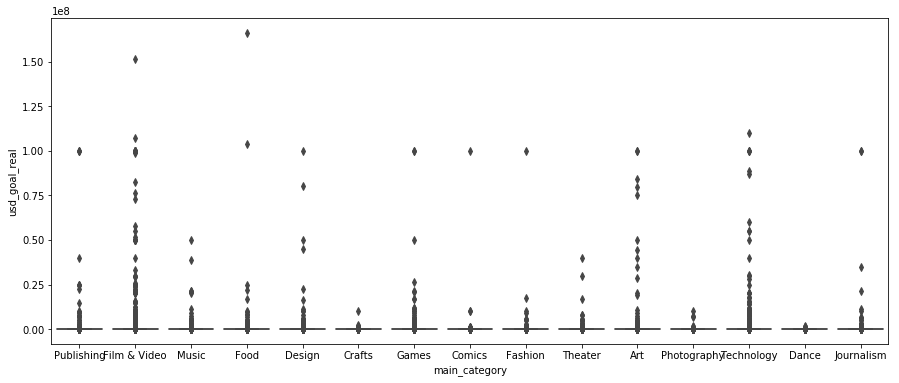

In [24]:
import seaborn
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
seaborn.boxplot(data=kickstarter_2018, x='main_category', y='usd_goal_real');

In [25]:
filter = kickstarter_2018['usd_goal_real'] < 0,25
filtered = kickstarter_2018[filter]
seaborn.boxplot(data=filtered, x='main_category', y='usd_goal_real');

TypeError: '(ID
1000002330    False
1000003930    False
1000004038    False
1000007540    False
1000011046    False
1000014025    False
1000023410    False
1000030581    False
1000034518    False
100004195     False
100004721     False
100005484     False
1000055792    False
1000056157    False
1000057089    False
1000064368    False
1000064918    False
1000068480    False
1000070642    False
1000071625    False
1000072011    False
1000081649    False
1000082254    False
1000087442    False
1000091520    False
1000102741    False
1000103948    False
1000104688    False
1000104953    False
100011318     False
              ...  
999832803     False
99984851      False
999865831     False
999867839     False
99987261      False
999877902     False
999878813     False
999880710     False
999884445     False
999893629     False
99991751      False
999929142     False
999931480     False
999934908     False
999941823     False
999943841     False
999950812     False
999955533     False
999963618     False
99996661      False
999969812     False
999971898     False
999972264     False
999975836     False
999976312     False
999976400     False
999977640     False
999986353     False
999987933     False
999988282     False
Name: usd_goal_real, Length: 378661, dtype: bool, 25)' is an invalid key